In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
df = pd.read_csv('train.csv')

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
ages = df['Age']

In [23]:
type(ages.values)

numpy.ndarray

# First, let's find out whether survival depends on age or not.

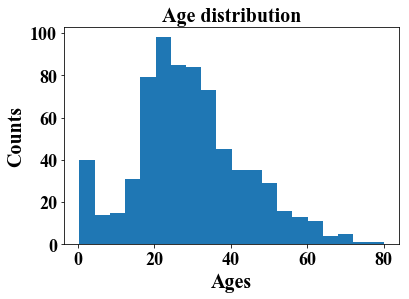

In [24]:

# plt.figure(figsize=(8,6))
'''
case = 1
if case == 1:
    %matplotlib notebook
    %matplotlib inline
elif case == 2:
    %matplotlib inline
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats('pdf')
elif case == 3:
    %matplotlib notebook
font = {'family' : 'times new roman',
        'weight' : 'regular',
        'size'   : 18}
matplotlib.rc('font', **font)
'''

plt.hist(ages.values[~np.isnan(ages.values)],bins=20)
plt.title('Age distribution',fontsize=20)
plt.xlabel('Ages',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.show()

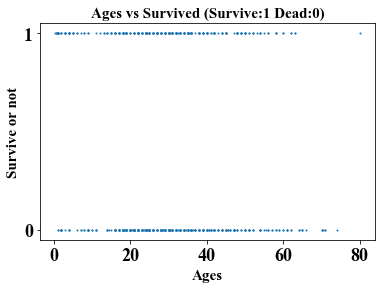

In [25]:
plt.scatter(ages.values[~np.isnan(ages.values)], df['Survived'].values[~np.isnan(ages.values)],s=1)
plt.title('Ages vs Survived (Survive:1 Dead:0)', fontsize = 15)
plt.yticks([0,1])
plt.xlabel('Ages', fontsize=15)
plt.ylabel('Survive or not', fontsize=15)
plt.show()

It looks like the age is irrevelant to whether the person survived or not. Let's see whether gender is relevant to whether the person survive or not.
# Next, let's examine the dependence of survival on gender.

female_number: 314
male number: 577
male survive rate:0.188908145581
female survive rate:0.742038216561


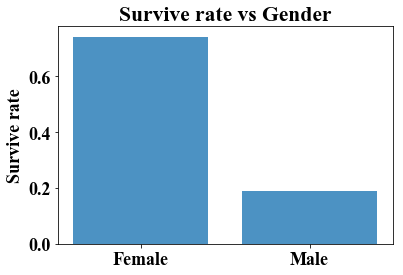

In [26]:
sex = df['Sex']
male_index = sex.values=='male'
female_index = sex.values=='female'
female_number =(sex.values=='female').sum()
print('female_number: '+str(female_number))
male_number = (sex.values=='male').sum()
print('male number: '+str(male_number))
male_survive_rate=(df['Survived'].values[male_index]==1).sum()/male_number
print('male survive rate:' + str(male_survive_rate))
female_survive_rate=(df['Survived'].values[female_index]==1).sum()/female_number
print('female survive rate:' + str(female_survive_rate))

objects = ('Female', 'Male')
x = np.arange(len(objects))
survive_rate = [female_survive_rate,male_survive_rate]
 
plt.bar(x, survive_rate, align='center', alpha=0.8)
plt.xticks(x, objects)
plt.ylabel('Survive rate')
plt.title('Survive rate vs Gender')
 
plt.show()

In [27]:
len(df['Age'])==(female_number + male_number)

True

# Check the dependence of survival on PClass

Class 1 numbers: 216
Class 2 numbers: 184
Class 3 numbers: 491
Total passenger number: 891
There is no missing values in Pclass feature


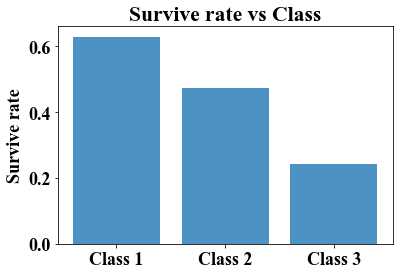

In [29]:
class_1_index = df['Pclass'].values==1
class_2_index = df['Pclass'].values==2
class_3_index = df['Pclass'].values==3
class_1_number = class_1_index.sum()
class_2_number = class_2_index.sum()
class_3_number = class_3_index.sum()
total_number = len(df['Pclass'])
class_1_survive_rate = (df['Survived'].values[class_1_index]==1).sum()/class_1_number
class_2_survive_rate = (df['Survived'].values[class_2_index]==1).sum()/class_2_number
class_3_survive_rate = (df['Survived'].values[class_3_index]==1).sum()/class_3_number
print('Class 1 numbers: ' + str(class_1_number))
print('Class 2 numbers: ' + str(class_2_number))
print('Class 3 numbers: ' + str(class_3_number))
print('Total passenger number: ' + str(total_number))
print('There is no missing values in Pclass feature')
objects = ('Class 1', 'Class 2', 'Class 3')
x = np.arange(len(objects))
survive_rate = [class_1_survive_rate,class_2_survive_rate,class_3_survive_rate]
 
plt.bar(x, survive_rate, align='center', alpha=0.8)
plt.xticks(x, objects)
plt.ylabel('Survive rate')
plt.title('Survive rate vs Class')
 
plt.show()

From the above figure, we can see that survive rate depends on the class.

# Examine sibling and spouse

In [39]:
sibsp = df['SibSp']
print(np.unique(sibsp))
#check if there is missing values
(sibsp.values>-1).sum()

[0 1 2 3 4 5 8]


891

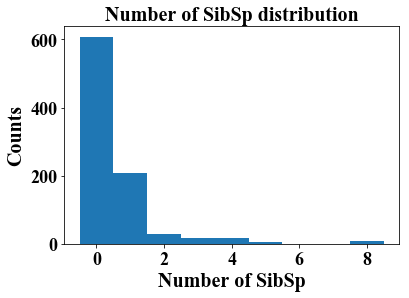

In [40]:
plt.hist(sibsp.values[~np.isnan(sibsp.values)],range=[-0.5, 8.5],bins=9)
plt.title('Number of SibSp distribution',fontsize=20)
plt.xlabel('Number of SibSp',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.show()

### Similary, we can plot the survive rate of people with different SibSp number.

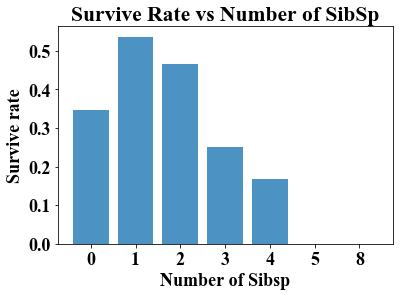

In [47]:
survive_rate = np.zeros(np.unique(sibsp).shape)
strs = []
j=0
for i in np.unique(sibsp):
    strs.append(str(i))
    index = (sibsp.values==i)
    number = index.sum()
    survive_rate[j] = (df['Survived'].values[index]==1).sum()/number
    j=j+1
# Make bar plot
objects = tuple(strs)
x = np.arange(len(objects))
 
plt.bar(x, survive_rate, align='center', alpha=0.8)
plt.xticks(x, objects)
plt.ylabel('Survive rate')
plt.xlabel('Number of Sibsp')
plt.title('Survive Rate vs Number of SibSp')
 
plt.show()

# Examine parents and children

In [48]:
parch = df['Parch']
print(np.unique(parch))
#check if there is missing values
(sibsp.values>-1).sum()

[0 1 2 3 4 5 6]


891

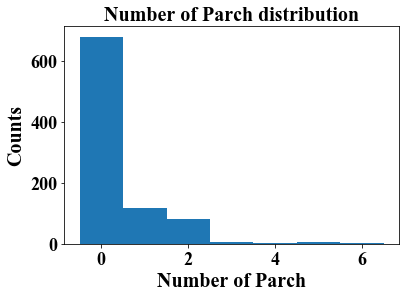

In [49]:
plt.hist(parch.values, range=[-0.5, 6.5],bins=7)
plt.title('Number of Parch distribution',fontsize=20)
plt.xlabel('Number of Parch',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.show()

### Plot the survive rate of people with different Parents and children number

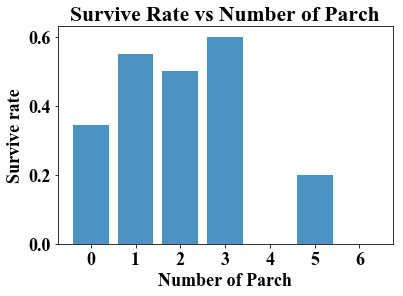

In [50]:
survive_rate = np.zeros(np.unique(parch).shape)
strs = []
j=0
for i in np.unique(parch):
    strs.append(str(i))
    index = (parch.values==i)
    number = index.sum()
    survive_rate[j] = (df['Survived'].values[index]==1).sum()/number
    j=j+1
# Make bar plot
objects = tuple(strs)
x = np.arange(len(objects))
 
plt.bar(x, survive_rate, align='center', alpha=0.8)
plt.xticks(x, objects)
plt.ylabel('Survive rate')
plt.xlabel('Number of Parch')
plt.title('Survive Rate vs Number of Parch')
 
plt.show()

# Let's if we can use feature Pclass, Sex, SibSp and Parch to train a classifier

## Let's try logistic regression first.

In [51]:
sex_cat = pd.factorize(df['Sex'])

In [56]:
#df['sex_cat']=sex_cat
len(sex_cat)

2

In [65]:
df['sex_cat']=sex_cat[0]

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [67]:
X = df[['Pclass', 'SibSp', 'Parch', 'sex_cat']].values

In [69]:
X.shape

(891, 4)

In [70]:
y = df['Survived'].values

In [72]:
y.shape

(891,)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.800224466891


In [85]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=3)
forest.fit(X, y)
y_pred = forest.predict(X)
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.812570145903


### It seems that those four features is not enough for building a good classifier
# Check dependence on fare

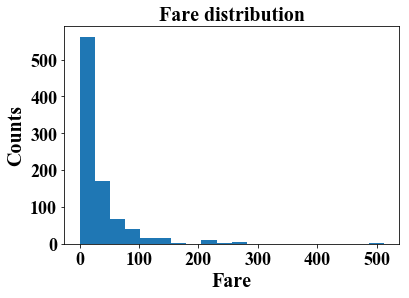

In [87]:
fare = df['Fare']
plt.hist(fare.values,bins=20)
plt.title('Fare distribution',fontsize=20)
plt.xlabel('Fare',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.show()

In [88]:
(df['Fare'].values>-1).sum()

891

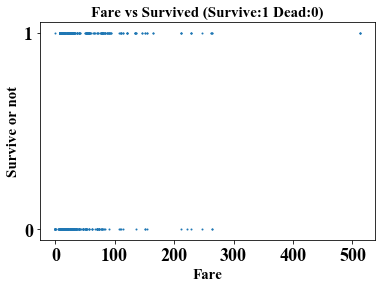

In [89]:
plt.scatter(fare.values, df['Survived'].values,s=1)
plt.title('Fare vs Survived (Survive:1 Dead:0)', fontsize = 15)
plt.yticks([0,1])
plt.xlabel('Fare', fontsize=15)
plt.ylabel('Survive or not', fontsize=15)
plt.show()

## Check on embark port

In [96]:
embarked_cat = pd.factorize(df['Embarked'])
embarked = df['Embarked']

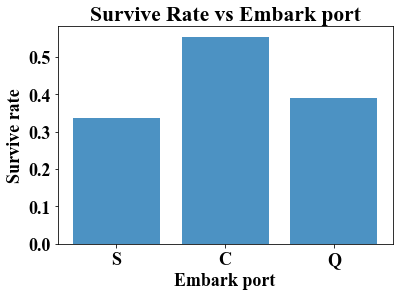

In [97]:
survive_rate = np.zeros(3)
strs = []
j=0
for i in ['S', 'C', 'Q']:
    strs.append(str(i))
    index = (embarked.values==i)
    number = index.sum()
    survive_rate[j] = (df['Survived'].values[index]==1).sum()/number
    j=j+1
# Make bar plot
objects = tuple(strs)
x = np.arange(len(objects))
 
plt.bar(x, survive_rate, align='center', alpha=0.8)
plt.xticks(x, objects)
plt.ylabel('Survive rate')
plt.xlabel('Embark port')
plt.title('Survive Rate vs Embark port')
 
plt.show()

# Include embark port and fare features for model training

In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [105]:
# Apply one hot encode to embark port
df['C'] = (df['Embarked'].values=='C')*1
df['Q'] = (df['Embarked'].values=='Q')*1
df['S'] = (df['Embarked'].values=='S')*1

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_cat,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1


In [107]:
X = df[['Pclass', 'SibSp', 'Parch', 'sex_cat','Fare','C','Q','S']].values

In [108]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X)

In [114]:
X_train

array([[ 1.        ,  0.125     ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.125     ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.        ,  0.125     ,  0.33333333, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

## Try some simple models

In [150]:
forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train, y)
y_pred = forest.predict(X_train)
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.907968574635


In [149]:
from sklearn.svm import SVC
svm = SVC(kernel ='rbf', C=10)
svm.fit(X_train, y)
y_pred = svm.predict(X_train)
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.812570145903


In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
knn = KNeighborsClassifier()
knn.fit(X_train, y)
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.809203142536


In [230]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', activation = 'tanh', alpha=1e-9, hidden_layer_sizes=(10,), random_state=1)
clf.fit(X_train, y)
y_pred = clf.predict(X_train)
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.830527497194


In [151]:
test_df = pd.read_csv('test.csv')

In [154]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [153]:
test_df['sex_cat']=(test_df['Sex'].values == 'female') * 1

In [155]:
# Apply one hot encode to embark port
test_df['C'] = (test_df['Embarked'].values=='C')*1
test_df['Q'] = (test_df['Embarked'].values=='Q')*1
test_df['S'] = (test_df['Embarked'].values=='S')*1

In [166]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
sex_cat        418 non-null int32
C              418 non-null int32
Q              418 non-null int32
S              418 non-null int32
dtypes: float64(2), int32(4), int64(4), object(5)
memory usage: 42.5+ KB


In [174]:
# Change the nan value in fare to the average value
nan_index=np.isnan(test_df['Fare'].values)
test_df['Fare'].values[nan_index]=np.mean(test_df['Fare'].values[~nan_index])

In [176]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
sex_cat        418 non-null int32
C              418 non-null int32
Q              418 non-null int32
S              418 non-null int32
dtypes: float64(2), int32(4), int64(4), object(5)
memory usage: 42.5+ KB


In [178]:
X_test_prev = test_df[['Pclass', 'SibSp', 'Parch', 'sex_cat','Fare','C','Q','S']].values

In [179]:
X_test = mm_scaler.transform(X_test_prev)

In [186]:
y_test =  forest.predict(X_test)

In [187]:
y_test.shape

(418,)

In [188]:
len(y_test)

418

In [189]:
test_df['Survive_pred'] = y_test

In [191]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_cat,C,Q,S,Survive_pred
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,1,1


In [202]:
sub_df = test_df[['PassengerId', 'Survive_pred']]
sub_df.rename(columns={'Survive_pred': 'Survived'}, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [204]:
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [206]:
sub_df.to_csv(path_or_buf='test_pred.csv', index=False)

In [208]:
y_test_svm = svm.predict(X_test)

In [218]:
data_sub=np.concatenate((test_df['PassengerId'].values[:,np.newaxis],y_test_svm[:,np.newaxis]), axis=-1)

In [220]:
sub_svm = pd.DataFrame(data= data_sub, columns = ['PassengerId', 'Survived'])

In [221]:
sub_svm.to_csv(path_or_buf='test_pred.csv', index=False)

In [228]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train,y)
y_pred = tree.predict(X_train)
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.833894500561


In [229]:
y_test_tree = tree.predict(X_test)
sub_tree = pd.DataFrame(data= np.concatenate((test_df['PassengerId'].values[:,np.newaxis],y_test_tree[:,np.newaxis]), axis=-1), columns = ['PassengerId', 'Survived'])
sub_tree.to_csv(path_or_buf='test_pred_tree.csv', index=False)

In [231]:
# Use neural network 
y_test_nn = clf.predict(X_test)
sub_nn = pd.DataFrame(data= np.concatenate((test_df['PassengerId'].values[:,np.newaxis],y_test_nn[:,np.newaxis]), axis=-1), columns = ['PassengerId', 'Survived'])
sub_nn.to_csv(path_or_buf='test_pred_nn.csv', index=False)

This is by far the best results I have obtained. The score is 79.4 according to the submission result on Kaggle.
After referring to some other's work, I realized that feature 'Name' and 'Age' actually contains useful information. We could use those two features to create a better classifier.

# Seaborn is very useful library for making plots out of pandas dataframe.
## I will try to use it in notebook Titanic project_v2.